>Абид, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

> **_<span style="color:blue">Привет, Александр!</span>_**

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-info">

## Шаг 1. Откроем файл с данными и изучим общую информацию

Имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

Откроем файл с данными:

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем основную информацию о базе данных:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выведем первые 5 строк:

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем информацию по столбцам:

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выведем информацию о дубликатах:

In [6]:
df.duplicated().value_counts()

False    23699
dtype: int64

Изучим выбросы:

Количество объявлений о продаже квартир высотой потолка менее 2.4 метра: 21
Количество объявлений о продаже квартир высотой потолка более 10 метров: 25


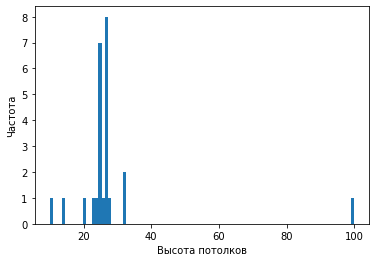

In [7]:
df['ceiling_height'].plot(kind='hist', range = (10, 100), bins=100)
plt.xlabel('Высота потолков')
plt.ylabel('Частота')
print('Количество объявлений о продаже квартир высотой потолка менее 2.4 метра:', len(df.query("ceiling_height < 2.4")))
print('Количество объявлений о продаже квартир высотой потолка более 10 метров:', len(df.query("ceiling_height > 10")))

### Вывод

- Пропущенные значения имеются во множестве столбцов. Так в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. Необходимо их устранить.
- Некорректные типы данных, которые необходимо заменить: 
    - в столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`: `float64` вместо `int64` (значения в этих слобцах должны быть целыми числами).
    - в столбце `is_apartment`: `object` вместо `bool` (связано с тем, что помимо `True` и `False` в столбце имеются пропущенные значения).
- Дата в некорректном формате.
- В базе данных отсутствуют дубликаты.
- В столбце высоты потолка квартиры имеются вбросы.


>**_<span style="color:green">Здесь всё структурировано и по делу, класс. </span>_**
>
>**_<span style="color:orange">Совет на будущее: Разбивай код на отдельные ячейки и не увлекайся массовым выводом через функцию `print` (для таблиц лучше использовать встроенные возможности jupyter notebook, или функцию `display`) — это не особо принято в среде аналитиков. Ячейки помогают сделать алгоритм решения более понятным. Не пытайся уместить всё в одной, но и на каждый «чих» создавать ячейку тоже не нужно. Одна ячейка — один важный шаг. Более подробно о правилах оформления проектов ты можешь почитать тут: https://www.notion.so/35d9c2f32ffa42f3b17010737aedca4b.</span>_**

> **_<span style="color:blue">Разбил на ячейки.</span>_**

<div class="alert alert-info">

## Шаг 2. Предобработка данных

### 2.1. Работа с пропусками

Расчитаем процент пропусков в столбцах, в которых есть пропущенные значения:

In [8]:
print("Процент пропусков в столбце ceiling_height: {:.2%}".format((23699 - df['ceiling_height'].count())/23699))
print("Процент пропусков в столбце floors_total: {:.2%}".format((23699 - df['floors_total'].count())/23699))
print("Процент пропусков в столбце living_area: {:.2%}".format((23699 - df['living_area'].count())/23699))
print("Процент пропусков в столбце is_apartment: {:.2%}".format((23699 - df['is_apartment'].count())/23699))
print("Процент пропусков в столбце kitchen_area: {:.2%}".format((23699 - df['kitchen_area'].count())/23699))
print("Процент пропусков в столбце balcony: {:.2%}".format((23699 - df['balcony'].count())/23699))
print("Процент пропусков в столбце locality_name: {:.2%}".format((23699 - df['locality_name'].count())/23699))
print("Процент пропусков в столбце airports_nearest: {:.2%}".format((23699 - df['airports_nearest'].count())/23699))
print("Процент пропусков в столбце cityCenters_nearest: {:.2%}".format((23699 - df['cityCenters_nearest'].count())/23699))
print("Процент пропусков в столбце parks_around3000: {:.2%}".format((23699 - df['parks_around3000'].count())/23699))
print("Процент пропусков в столбце parks_nearest: {:.2%}".format((23699 - df['parks_nearest'].count())/23699))
print("Процент пропусков в столбце ponds_around3000: {:.2%}".format((23699 - df['ponds_around3000'].count())/23699))
print("Процент пропусков в столбце ponds_nearest: {:.2%}".format((23699 - df['ponds_nearest'].count())/23699))
print("Процент пропусков в столбце days_exposition: {:.2%}".format((23699 - df['days_exposition'].count())/23699))

Процент пропусков в столбце ceiling_height: 38.80%
Процент пропусков в столбце floors_total: 0.36%
Процент пропусков в столбце living_area: 8.03%
Процент пропусков в столбце is_apartment: 88.29%
Процент пропусков в столбце kitchen_area: 9.61%
Процент пропусков в столбце balcony: 48.61%
Процент пропусков в столбце locality_name: 0.21%
Процент пропусков в столбце airports_nearest: 23.38%
Процент пропусков в столбце cityCenters_nearest: 23.29%
Процент пропусков в столбце parks_around3000: 23.28%
Процент пропусков в столбце parks_nearest: 65.91%
Процент пропусков в столбце ponds_around3000: 23.28%
Процент пропусков в столбце ponds_nearest: 61.56%
Процент пропусков в столбце days_exposition: 13.42%



>**_<span style="color:orange">Кажется, мы очень сильно усложнили себе жизнь. Не стоит забывать и о более простых способах вывести информацию о количестве пропусков. </span>_**
>


In [9]:
### Код ревьювера ###

df.isnull().sum() / len(df) * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

> **_<span style="color:blue">Спасибо за информацию!</span>_**

В столбцах `floors_total`, `locality_name` меньше 1% пропусков от числа строк базы данных, поэтому объявления с пропущенными значениями в этих столбцах можно удалить. Пропуски в остальных столбцах необходимо заменить на определенные значения.

In [10]:
df1 = df.dropna(subset=['floors_total', 'locality_name'])
print("Процент сокращения базы данных после проведенного удаления объявлений: {:.2%}".format((len(df) - len(df1))/len(df)))

Процент сокращения базы данных после проведенного удаления объявлений: 0.57%


После удаления этих объявлений суммарно потеряли 11.79% строк от первоначальной базы данных.

Проведем работу над остальными столбцами. Начнем со столбца `is_apartment`. Предположим, что пропущенные значения означают, что квартира не является аппартаментом, и заполним эти пропуски значением `False`.

In [11]:
df1['is_apartment'].fillna(False, inplace=True)

Предположим, что пропущенные значения в столбце `balcony` означают отсутствие балкона, и заменим эти пропуски на ноль.

In [12]:
df1['balcony'].fillna(0, inplace=True)

В столбце `ceiling_height` заменим пропущенные значения мединами высоты потолка группировкой по стоимости квартиры, предположив, что чем дороже квартира, тем выше потолки. Также поступим с столбцами `living_area`, `kitchen_area`, `days_exposition`.

In [13]:
#def last_price_group(last_price):
#    if last_price < 2000000:
#        return 'less than 2m'
#    if 2000000 <= last_price < 3000000:
#        return 'from 2m to 3m'
#    if 3000000 <= last_price < 4000000:
#        return 'from 3m to 4m'
#    if 4000000 <= last_price < 5000000:
#        return 'from 4m to 5m'
#    if 5000000 <= last_price < 6000000:
#        return 'from 5m to 6m'
#    if 6000000 <= last_price < 7000000:
#        return 'from 6m to 7m'
#    if 7000000 <= last_price < 8000000:
#        return 'from 7m to 8m'
#    if 8000000 <= last_price < 9000000:
#        return 'from 8m to 9m'
#    if 9000000 <= last_price < 10000000:
#        return 'from 9m to 10m'    
#    if last_price >= 10000000:
#        return 'more than 10m'
#df1['last_price_group'] = df1['last_price'].apply(last_price_group)
#last_price_ceiling_height_pivot = df1.pivot_table(index = ['last_price_group'], values = 'ceiling_height', aggfunc = ['median', 'count'])
#display(last_price_ceiling_height_pivot)
#print()

#for group in df1['last_price_group'].unique():
#    median = df1.loc[(df1['last_price_group'] == group), 'ceiling_height'].median()
#    df1.loc[(df1['ceiling_height'].isna()) & (df1['last_price_group'] == group), 'ceiling_height'] = median
    
#for group in df1['last_price_group'].unique():
#    median = df1.loc[(df1['last_price_group'] == group), 'living_area'].median()
#    df1.loc[(df1['living_area'].isna()) & (df1['last_price_group'] == group), 'living_area'] = median
    
#for group in df1['last_price_group'].unique():
#    median = df1.loc[(df1['last_price_group'] == group), 'kitchen_area'].median()
#    df1.loc[(df1['kitchen_area'].isna()) & (df1['last_price_group'] == group), 'kitchen_area'] = median

#for group in df1['last_price_group'].unique():
#    median = df1.loc[(df1['last_price_group'] == group), 'days_exposition'].median()
#    df1.loc[(df1['days_exposition'].isna()) & (df1['last_price_group'] == group), 'days_exposition'] = median

В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` заменим пропущенные значения путем заполнения медианными значениями соответствущих населенных пунктов.

In [14]:
#for name in df1['locality_name'].unique():
#    median = df1.loc[(df1['locality_name'] == name), 'airports_nearest'].median()
#    df1.loc[(df1['airports_nearest'].isna()) & (df1['locality_name'] == name), 'airports_nearest'] = median
    
for name in df1['locality_name'].unique():
    median = df1.loc[(df1['locality_name'] == name), 'cityCenters_nearest'].median()
    df1.loc[(df1['cityCenters_nearest'].isna()) & (df1['locality_name'] == name), 'cityCenters_nearest'] = median

#for name in df1['locality_name'].unique():
#    median = df1.loc[(df1['locality_name'] == name), 'parks_around3000'].median()
#    df1.loc[(df1['parks_around3000'].isna()) & (df1['locality_name'] == name), 'parks_around3000'] = median

#for name in df1['locality_name'].unique():
#    median = df1.loc[(df1['locality_name'] == name), 'parks_nearest'].median()
#    df1.loc[(df1['parks_nearest'].isna()) & (df1['locality_name'] == name), 'parks_nearest'] = median

#for name in df1['locality_name'].unique():
#    median = df1.loc[(df1['locality_name'] == name), 'ponds_around3000'].median()
#    df1.loc[(df1['ponds_around3000'].isna()) & (df1['locality_name'] == name), 'ponds_around3000'] = median

#for name in df1['locality_name'].unique():
#    median = df1.loc[(df1['locality_name'] == name), 'ponds_nearest'].median()
#    df1.loc[(df1['ponds_nearest'].isna()) & (df1['locality_name'] == name), 'ponds_nearest'] = median   

> **<span style="color:orange">Такое заполнение пропуска может скорее помешать.</span>**
>
> **<span style="color:orange">*Пример*: в дальнейшем анализе мы можем захотеть посчитать зависимость цены от высоты потолка. При таком заполнении пропуска, мы добавим к реальным данным (где есть и заполенная высота потолка, и цена) наши синтетические (медианы значений высоты потолка и реальные цены этих квартир).</span>** 
>
> **<span style="color:orange">*Что произойдет*: мы можем сделать неправильные выводы из анализа зависимости цены от потолка.</span>** 
>
> **<span style="color:orange">*Как правильно поступить в случае этого столбца*: забить на пропуск : ) Подавляющее большинство методов анализа, которые вы сейчас проходите, будут корректно обрабатывать датафрейм, в котоором в некоторых строках есть NaN в одном подмножестве столбцов, в некоторых – в другом. Это касается в том числе методов, используемых в этой домашке: точки на графиках для NaN-значений просто не построятся, корелляция для этих строк не посчитается, и часто это лучше, чем добавление множества синтетических точек.</span>** 
>
> **<span style="color:orange">*Когда так не надо делать?* Не стоит забивать на пропуск, если мы можем с большой уверенностью предположить возможную причину пропуска и полезное значение на замену. Такие примеры есть в этой домашке (например, балкон). Также в некоторые методы, в том числе некоторые методы машинного обучения, категорически не умеют работать с пропусками, но таких методов в вашем арсенале пока нет, можно не беспокоиться.</span>** 
>
> **_<span style="color:orange">В общем случае, если этого не требуют используемые методы, или если это явно не указано в задаче, то можно не ставить целью получить данные польностью без NaN.</span>_**
>

> **_<span style="color:blue">Закоментил все необязательное заполнение пропусков медианами. Оставил только заполнение в `cityCenters_nearest`. </span>_**

Так как значения в заполняемых столбцах в исходной базе данных имеются не для всех населенных пунктов, медианы расчитались не для всех из них. Заполним незаполнившиеся значения медианными значениями по всей Ленинградской области (хоть это не совсем корректно, но для выполнения иследования это единственный доступный вариант).

In [15]:
#df1['airports_nearest'].fillna(df1['airports_nearest'].median(), inplace=True)
df1['cityCenters_nearest'].fillna(df1['cityCenters_nearest'].median(), inplace=True)
#df1['parks_around3000'].fillna(df1['parks_around3000'].median(), inplace=True)
#df1['parks_nearest'].fillna(df1['parks_nearest'].median(), inplace=True)
#df1['ponds_around3000'].fillna(df1['ponds_around3000'].median(), inplace=True)
#df1['ponds_nearest'].fillna(df1['ponds_nearest'].median(), inplace=True)

### 2.2. Исправление некорректных типов данных

После устранения пропусков заменим в столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` тип данных на `int64`.

In [16]:
df1['floors_total'] = df1['floors_total'].astype('int64')
df1['balcony'] = df1['balcony'].astype('int64')
#df1['parks_around3000'] = df1['parks_around3000'].astype('int64')
#df1['ponds_around3000'] = df1['ponds_around3000'].astype('int64')
#df1['days_exposition'] = df1['days_exposition'].astype('int64')

### 2.3. Работа с датой и временем

Переведем значения в столбце `date_time` в формат даты.

In [17]:
df1['first_day_exposition'] = pd.to_datetime(df1['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Вывод

Проверим результат предобработки данных.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             21700 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            21343 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     23565 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around

В результате предобработки данных получили данные, пригодные для дальнейшего исследования.

- Заполнили пропущенные значения по необходимости.
- Привели в соответствие типы данных.
- Исправили формат даты.


>**_<span style="color:green">Здесь тоже ноль замечаний. Отдельно отмечу твой комплексный подход по предобработке данных. </span>_**


<div class="alert alert-info">

## Шаг 3. Посчитаем и добавим в таблицу

### 3.1. Добавим в таблицу: цена квадратного метра

Добавим в таблицу цену квадратного метра разделив цену на момент снятия с публикации `last_price` на площадь квартиры в квадратных метрах (м²) `total_area`.

In [19]:
df1['price_m2'] = df1['last_price']/df1['total_area']

### 3.2. Добавим в таблицу: день недели, месяц и год публикации объявления

In [20]:
df1['exposition_weekday'] = df1['first_day_exposition'].dt.weekday
df1['exposition_month'] = df1['first_day_exposition'].dt.month
df1['exposition_year'] = df1['first_day_exposition'].dt.year

### 3.3. Добавим в таблицу: этаж квартиры; варианты — первый, последний, другой

Добавим в таблицу этаж квартиры cгруппировав по: первый, последний, другой

In [21]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
df1['floor_group'] = df1.apply(floor_group, axis=1)

### 3.4. Добавим в таблицу: соотношение жилой и общей площади, а также соотношение площади кухни к общей

Добавим в таблицу: соотношение жилой `living_area` и общей площади `total_area`, а также соотношение площади кухни `kitchen_area` к общей `total_area`.

In [22]:
df1['living_total_area_rate'] = df1['living_area']/df1['total_area']
df1['kitchen_total_area_rate'] = df1['kitchen_area']/df1['total_area']

### Вывод

Проверим результат добавления новых столбцов.

In [23]:
display(df1.info())
print()
display(df1.head())
print()
display(df1.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 29 columns):
total_images               23565 non-null int64
last_price                 23565 non-null float64
total_area                 23565 non-null float64
first_day_exposition       23565 non-null datetime64[ns]
rooms                      23565 non-null int64
ceiling_height             14481 non-null float64
floors_total               23565 non-null int64
living_area                21700 non-null float64
floor                      23565 non-null int64
is_apartment               23565 non-null bool
studio                     23565 non-null bool
open_plan                  23565 non-null bool
kitchen_area               21343 non-null float64
balcony                    23565 non-null int64
locality_name              23565 non-null object
airports_nearest           18041 non-null float64
cityCenters_nearest        23565 non-null float64
parks_around3000           18065 non-null float64
park

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,exposition_weekday,exposition_month,exposition_year,floor_group,living_total_area_rate,kitchen_total_area_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,exposition_weekday,exposition_month,exposition_year,living_total_area_rate,kitchen_total_area_rate
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,21700.000000,21343.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,...,490.580448,0.769499,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,0.564937,0.187340
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,...,341.572956,0.938669,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,0.105310,0.072979
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.495444,0.133333
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.568210,0.172363
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.637913,0.232432
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


В результате проведенной работы добавили столбцы: 
- цена квадратного метра `price_m2`, 
- день недели публикации объявления`exposition_weekday`, 
- месяц публикации объявления`exposition_month`, 
- год публикации объявления`exposition_year`, 
- сгруппированные значения этажа кваритры (по первый, последний, другой) `floor_group`, 
- соотношение жилой и общей площади `living_total_area_rate`, 
- соотношение площади кухни к общей `kitchen_total_area_rate`.


>**_<span style="color:green">Здесь все хорошо, молодец!</span>_**


<div class="alert alert-info">

## Шаг 4. Проведем исследовательский анализ данных и выполним инструкции

### 4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

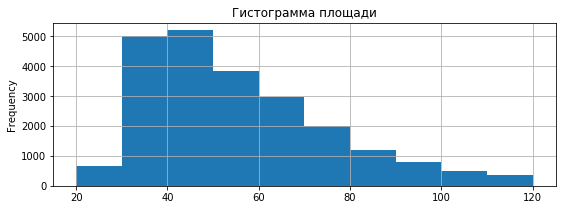

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

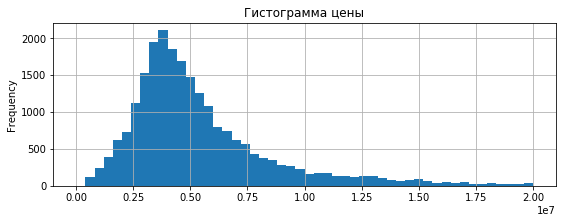

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

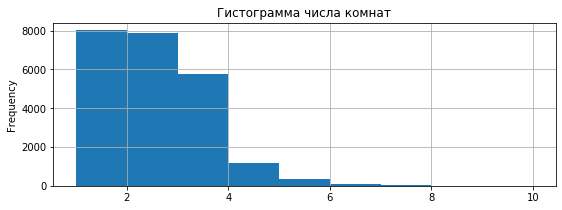

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

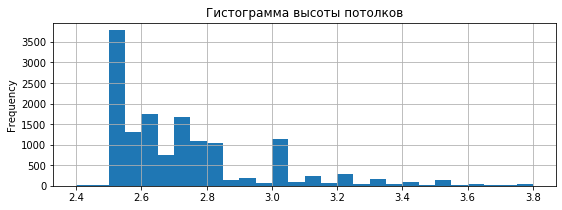

In [24]:
parameters = [['total_area', 10, (20,120), 'Гистограмма площади'], ['last_price', 50, (0,20e6), 'Гистограмма цены'], ['rooms', 9, (1,10), 'Гистограмма числа комнат'], ['ceiling_height', 28, (2.4, 3.8), 'Гистограмма высоты потолков']]
for parameter, bins, rang, title in parameters:
    df1[parameter].plot(kind='hist', grid=True, figsize=(9, 3), bins=bins, range=rang, title=title)
    display(df1[parameter].describe())
    plt.show()

#### Вывод

Изучили такие параметры как площадь, цена, число комнат, высота потолков. Обнаружили аномальные значения высоты потолков.


>**_<span style="color:red">~~Здесь все в целом неплохо, но нужно добавить подписи осей и названия для графиков. Также в среде аналитиков принято подобные однотипные выводы описательных статистик и построение графиков автоматизировать с помощью функций или циклов. Попробуй, пожалуйста, реализовать такой подход в своей работе. Я бы на твоем месте остановился на функции, в качестве аргументов которой мы могли бы передавать настройки для вывода графиков (количество корзин `bins`, `range`, название и подписи для осей).~~ </span>_**


> **_<span style="color:blue">Готово! </span>_**

### 4.2. Выполним задание: 
### "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

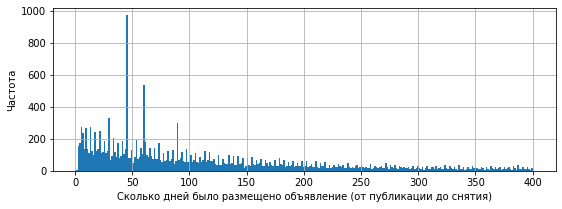

In [25]:
df1['days_exposition'].plot(kind='hist', range=(1, 400), bins=300, figsize=(9, 3), grid=True)
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Частота')
plt.show()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

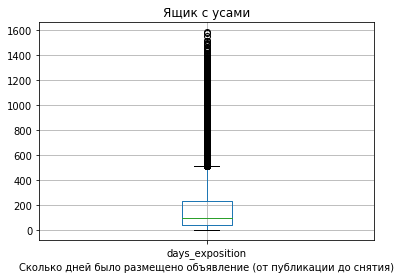

'Это быстро: 510 д'

'Это медленно: 1 д'

In [26]:
display(df1['days_exposition'].describe())
df1.boxplot('days_exposition')
plt.title('Ящик с усами')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.show()
good_time = df1[df1['days_exposition'] <= (df1['days_exposition'].quantile(.75) + 1.5 * (df1['days_exposition'].quantile(.75) - df1['days_exposition'].quantile(.25)))]
display('Это быстро: {:.0f} д'.format(good_time['days_exposition'].max())) #если продажи прошли дольше этого срока, то это долго
display('Это медленно: {:.0f} д'.format(good_time['days_exposition'].min())) #если продажи прошли меньше этого срока, то это быстро

#### Вывод

Средним значением количества дней, сколько было размещено объявление (от публикации до снятия) является 181 дней. Медианным значением 95 дней. У данных длинный хвост большого срока продажи. Наблюдается практически прямая убывающая зависимость продажи квартиры от срока размещения объявления (чем дольше висит объявление, тем меньше вероятность продать квартиру). Можно считать, что квартира продана быстро, если она продана за 1 день. А необычно долго, если прошло более 510 дней после публикации.


>**_<span style="color:green">Здесь все отлично, молодец.</span>_**


### 4.3. Выполненим задание: 
### "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."

Уберем из датафрейма аномально большие и аномально маленькие значения площади квартиры.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

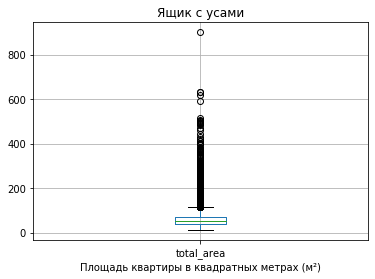

count    16635.000000
mean        61.413280
std         17.284956
min         40.000000
25%         46.600000
50%         57.900000
75%         72.000000
max        114.200000
Name: total_area, dtype: float64

In [27]:
display(df1['total_area'].describe())
df1.boxplot('total_area')
plt.title('Ящик с усами')
plt.xlabel('Площадь квартиры в квадратных метрах (м²)')
plt.show()

good_data = df1
good_data = good_data[(good_data['total_area'] <= (good_data['total_area'].quantile(.75) + 1.5 * (good_data['total_area'].quantile(.75) - good_data['total_area'].quantile(.25)))) & (good_data['total_area'] >= good_data['total_area'].quantile(.25))]
display(good_data['total_area'].describe())

Уберем из датафрейма объявления с числом комнат равным нулю.

In [28]:
good_data = good_data.query('rooms != 0')

#### Вывод

Убрали редкие и выбивающиеся значения. Удалили редкие значения площади квартиры и нулевого числа комнат.

In [29]:
### Код ревьювера ###

display(len(good_data) / len(df))

0.7015907844212836

> **_<span style="color:red">~~Кажется, на этом шаге мы удаляем очень большую часть данных — более четверти.~~</span>_**
>
> **_<span style="color:red">~~Для нашей задачи исследовательского анализа и поиска зависимостей — это много. Я бы не стал искать аномалии в высоте потолков  Все-таки это не ключевой параметр, определяющий стоимость квартир. Я бы на твоем месте искал выбросы только по общей цене и площади — так мы гарантировано исключим самые аномальные объекты, и при этом не потеряем много данных. Поправь, пожалуйста.~~</span>_**


> **_<span style="color:blue">Заменил на устранение аномалий по общей площади. Не стал делать по цене, так как в этом случае больше данных теряем.</span>_**

### 4.4. Выполним задания: 
### "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года". 
### "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "

#### 4.4.1 Изучим зависимость цены квартиры от квадратного метра

Корреляция между ценой и квадратным метром: 0.64


Text(0, 0.5, 'Цена на момент снятия с публикации')

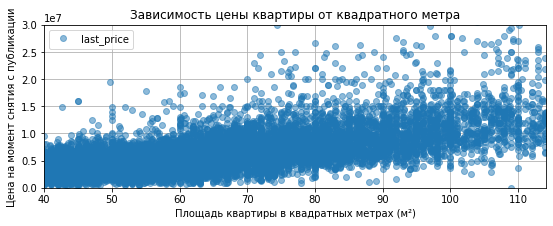

In [30]:
#good_data = good_data[(good_data['total_area'] <= (good_data['total_area'].quantile(.75) + 1.5 * (good_data['total_area'].quantile(.75) - good_data['total_area'].quantile(.25)))) & (good_data['total_area'] >= good_data['total_area'].quantile(.25))]
print('Корреляция между ценой и квадратным метром: {:.2f}'.format(good_data['last_price'].corr(good_data['total_area'])))
good_data.plot(y='last_price', x='total_area', style='o', alpha=0.5, figsize=(9, 3), grid=True, ylim=(0, 3e7))
plt.title('Зависимость цены квартиры от квадратного метра')
plt.xlabel('Площадь квартиры в квадратных метрах (м²)')
plt.ylabel('Цена на момент снятия с публикации')

#### 4.4.2. Изучим зависимость цены квартиры от числа комнат

Корреляция между ценой и числом комнат: 0.24


,last_price
rooms,
1,4.857564e+06
2,5.501180e+06
3,6.964810e+06
4,7.597114e+06
5,7.963472e+06
6,1.093188e+07
more than 6,1.349000e+07


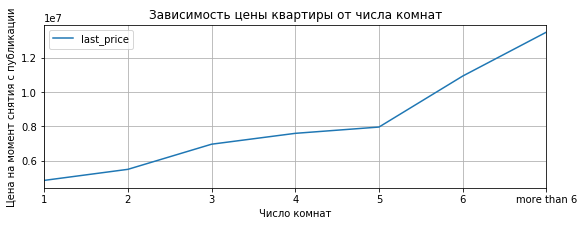

In [31]:
print('Корреляция между ценой и числом комнат: {:.2f}'.format(good_data['last_price'].corr(good_data['rooms'])))
rooms_data = good_data[['rooms', 'last_price']]
rooms_data.loc[(rooms_data['rooms'] > 6), 'rooms'] = 'more than 6'
display(rooms_data.pivot_table(index='rooms', values='last_price'))
rooms_data.pivot_table(index='rooms', values='last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость цены квартиры от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.4.3. Изучим зависимость между ценой и этажом 

,last_price
floor_group,
первый,4.774752e+06
последний,5.427596e+06
другой,6.313782e+06


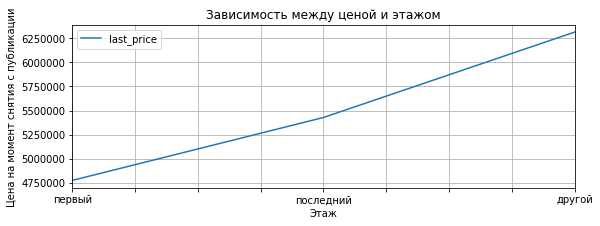

In [32]:
display(good_data.pivot_table(index='floor_group', values='last_price').sort_values('last_price'))
good_data.pivot_table(index='floor_group', values='last_price').sort_values('last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и этажом')
plt.xlabel('Этаж')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.4.4. Изучим зависимость между ценой и удалённостью от центра

Корреляция между ценой и удалённостью от центра: -0.28


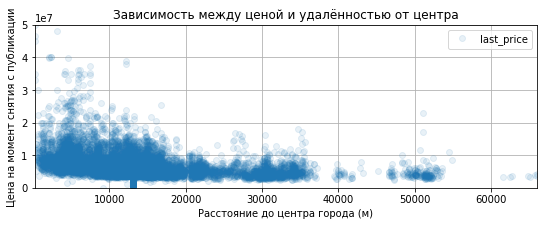

In [33]:
print('Корреляция между ценой и удалённостью от центра: {:.2f}'.format(good_data['last_price'].corr(good_data['cityCenters_nearest'])))
good_data.plot(y='last_price', x='cityCenters_nearest', style='o', alpha=0.1, ylim=(0, 0.5e8), figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и удалённостью от центра')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.4.5. Изучим зависимость между ценой и днем недели размещения

Корреляция между ценой и днем недели размещения: -0.02


,last_price
exposition_weekday,
0,5.999365e+06
1,6.083616e+06
2,6.000740e+06
3,6.101600e+06
4,5.903762e+06
5,5.801554e+06
6,5.836551e+06


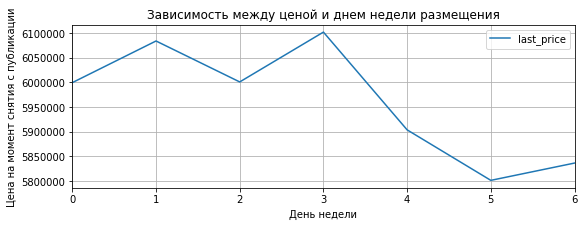

In [34]:
print('Корреляция между ценой и днем недели размещения: {:.2f}'.format(good_data['last_price'].corr(good_data['exposition_weekday'])))
display(good_data.pivot_table(index='exposition_weekday', values='last_price'))
good_data.pivot_table(index='exposition_weekday', values='last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и днем недели размещения')
plt.xlabel('День недели')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.4.6. Изучим зависимость между ценой и месяцем размещения

Корреляция между ценой и месяцем размещения: -0.00


,last_price
exposition_month,
1,6.054568e+06
2,5.990941e+06
3,5.928939e+06
4,6.035123e+06
5,5.884939e+06
6,5.930289e+06
7,5.939465e+06
8,6.038071e+06
9,6.224421e+06


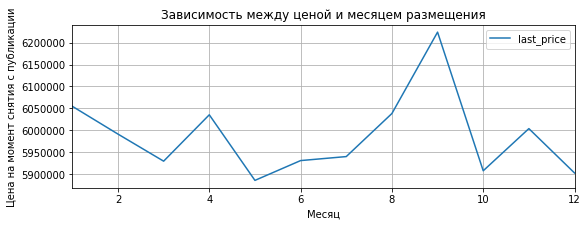

In [35]:
print('Корреляция между ценой и месяцем размещения: {:.2f}'.format(good_data['last_price'].corr(good_data['exposition_month'])))
display(good_data.pivot_table(index='exposition_month', values='last_price'))
good_data.pivot_table(index='exposition_month', values='last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и месяцем размещения')
plt.xlabel('Месяц')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.4.7. Изучим зависимость между ценой и годом размещения

Корреляция между ценой и годом размещения: -0.01


,last_price
exposition_year,
2014,8.169636e+06
2015,6.494267e+06
2016,5.940823e+06
2017,5.879273e+06
2018,5.885451e+06
2019,6.331973e+06


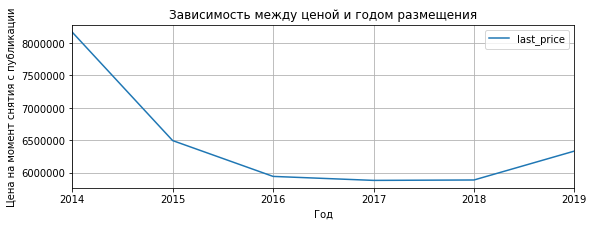

In [36]:
print('Корреляция между ценой и годом размещения: {:.2f}'.format(good_data['last_price'].corr(good_data['exposition_year'])))
display(good_data.pivot_table(index='exposition_year', values='last_price'))
good_data.pivot_table(index='exposition_year', values='last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и годом размещения')
plt.xlabel('Год')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

> **_<span style="color:red">Здесь все хорошо, но нужно добавить подписи и названия для графиков. Также было бы неплохо всё-таки вывести общую матрицу корреляций сразу по всем параметрам.</span>_**
>



> **_<span style="color:blue">Все добавил.</span>_**

#### 4.4.8. Разберем общую матрицу корреляций по всем параметрам

In [37]:
display(good_data.corr())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,exposition_weekday,exposition_month,exposition_year,living_total_area_rate,kitchen_total_area_rate
total_images,1.000000,0.137270,0.090777,0.043760,0.006144,0.031142,0.064754,0.050149,0.009481,NaN,...,-0.012477,-0.024130,0.009512,-0.047250,0.134946,-0.009294,0.005345,0.163176,-0.016077,0.007313
last_price,0.137270,1.000000,0.643239,0.236094,0.098783,0.151858,0.463128,0.120469,0.053730,NaN,...,0.035481,0.207276,-0.101060,0.092150,0.846895,-0.018218,-0.000283,-0.009191,-0.094151,0.082896
total_area,0.090777,0.643239,1.000000,0.661878,0.086858,0.054011,0.858578,0.031687,0.022051,NaN,...,0.013083,0.131659,-0.068285,0.120215,0.199282,-0.016450,0.004578,-0.060124,0.121456,-0.213886
rooms,0.043760,0.236094,0.661878,1.000000,0.003544,-0.227556,0.828759,-0.175812,-0.011321,NaN,...,-0.069509,0.009605,-0.010755,0.065779,-0.120081,0.000469,-0.005030,-0.023608,0.605175,-0.592929
ceiling_height,0.006144,0.098783,0.086858,0.003544,1.000000,-0.024584,0.065807,-0.012282,0.055680,NaN,...,-0.010082,0.077500,-0.070774,0.022402,0.080160,-0.009103,-0.008994,-0.005618,-0.010730,0.034611
floors_total,0.031142,0.151858,0.054011,-0.227556,-0.024584,1.000000,-0.155416,0.674771,-0.029572,NaN,...,0.099452,-0.108679,0.052862,-0.053266,0.220077,0.009854,0.005747,0.010479,-0.413179,0.333428
living_area,0.064754,0.463128,0.858578,0.828759,0.065807,-0.155416,1.000000,-0.118615,0.008923,NaN,...,-0.053944,0.081745,-0.035305,0.104120,0.038341,-0.010317,-0.005563,-0.045199,0.592008,-0.532411
floor,0.050149,0.120469,0.031687,-0.175812,-0.012282,0.674771,-0.118615,1.000000,-0.016158,NaN,...,0.073403,-0.067644,0.045950,-0.050380,0.174605,0.012072,0.012907,0.020188,-0.299844,0.242464
is_apartment,0.009481,0.053730,0.022051,-0.011321,0.055680,-0.029572,0.008923,-0.016158,1.000000,NaN,...,-0.030278,0.022288,0.007380,0.009466,0.050038,-0.010352,0.003427,0.014396,-0.009628,0.029769
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
### Код ревьювера ###

#Поскольку нас интересуют в основном зависимости от цены, можно оставить только колонку с ценой

(good_data
 .corr()['last_price']
 .to_frame()
 .fillna(0)
 .sort_values('last_price', ascending=False)
 .style
 .background_gradient(cmap='Greens')
)

,last_price
last_price,1
price_m2,0.846895
total_area,0.643239
kitchen_area,0.501506
living_area,0.463128
rooms,0.236094
ponds_around3000,0.207276
parks_around3000,0.186343
floors_total,0.151858
total_images,0.13727


#### 4.4.9. Разберем цену в населенных пунктах

Санкт-Петербург      11241
посёлок Шушары         330
Всеволожск             302
Пушкин                 257
Колпино                250
посёлок Мурино         227
Гатчина                223
посёлок Парголово      213
Выборг                 168
деревня Кудрово        147
Name: locality_name, dtype: int64

,price_m2
locality_name,
Санкт-Петербург,109866.957306
Пушкин,101253.173262
деревня Кудрово,88101.791746
посёлок Парголово,85586.877442
посёлок Мурино,78512.607869
посёлок Шушары,75225.988314
Колпино,72046.959220
Гатчина,68120.593810
Всеволожск,66136.674663


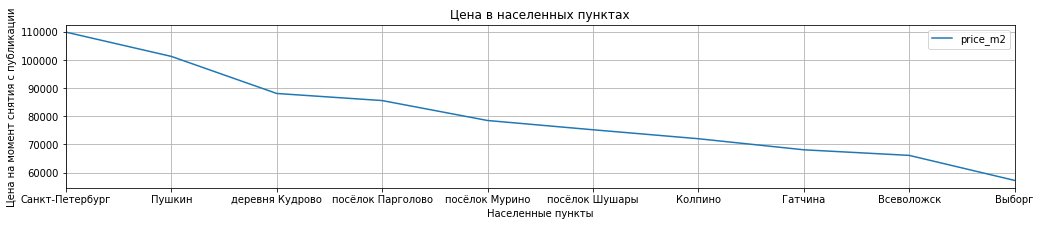

In [38]:
display(good_data['locality_name'].value_counts().head(10))

top_announcements = good_data['locality_name'].value_counts().head(10).index
top_announcements_data = good_data.query("locality_name in @top_announcements")

price_m2_pivot = top_announcements_data.pivot_table(index='locality_name', values='price_m2')
display(price_m2_pivot.sort_values('price_m2', ascending=False))
price_m2_pivot.sort_values('price_m2', ascending=False).plot(figsize=(17,3), grid=True)
plt.title('Цена в населенных пунктах')
plt.xlabel('Населенные пункты')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### Вывод

В результате проведенной работы выяснили:

1) Существует сильная зависимость между ценой квартиры и количеством квадратных метров. Причем чем больше площадь, тем больше вероятность, что квартира окажется очень дорогой (элитной). Количество элитных квартир возрастает с площади 120м2. 

2) Существует практически линейная зависимость между ценой квартиры и количеством комнат, с точкой сильного роста начиная с пяти комнат.

3) Существует сильная зависимость между ценой квартиры и этажом. Так средняя цена квартиры на первом этаже 4,7млн.руб., на последнем - 5,4млн.руб., а между первым и последним - 6.3млн.руб. Квартиры на первых этажах сильно дешевле остальных.

4) Существует небольшая отрицательная зависимость между ценой квартиры и удаленностью от центра. Причем чем ближе квартира к центру, тем больше вероятность, что квартира окажется очень дорогой (элитной). Количество элитных квартир резко уменьшается с расстояния более 8км от центра.

5) Существует небольшая зависимость между ценой квартиры и днем недели размещения объявления. Объявления, выложенные в субботу и воскресенье имеют минимальную стоимость.

6) Существует небольшая зависимость между ценой квартиры и месяцем размещения объявления. Объявления, выложенные в сентябре имеют максимальную среднюю цену. В целом разница очень несущественная.

7) Существует заметная зависимость между ценой квартиры и годом размещения объявления. Начиная с 2014 года наблюдается продолжительный спад в цене, который меняется на рост, начиная с 2018 года. Очевидно, что падение цен связано с очередным  финансовым кризисом.

8) В Санкт-Петербурге ожидаемо самая высокая стоимость квадратного метра - 114т.р./м2. Замыкает десятку в этой категории Всеволожск - 67т.р./м2.

> **_<span style="color:green">Здесь все классно. отдельно отмечу твои равзернутые и аргументированные выводы.</span>_**
>



### 4.5. Выполним задание: 
### "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

,price_m2
saintp_center,
0,164785.081331
1,133591.838351
2,135820.976461
3,122064.614512
4,134168.660132
5,133233.943777
6,132343.422513
7,130860.112728
8,117615.782039


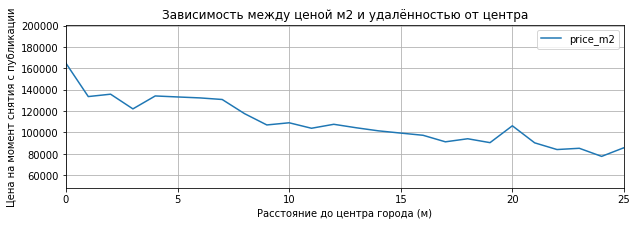

In [39]:
saintp = good_data.query("locality_name == 'Санкт-Петербург'")
saintp['saintp_center'] = saintp['cityCenters_nearest']/1000
saintp['saintp_center'] = saintp['saintp_center'].astype('int64')
saintp_pivot = saintp.pivot_table(index='saintp_center', values='price_m2')
display(saintp_pivot.head(10))
saintp_pivot.plot(figsize=(10, 3), grid=True, xlim=(0, 25))
plt.title('Зависимость между ценой м2 и удалённостью от центра')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### Вывод

Определили, что радиус в 7 км от центра является центральной зоной Санкт-Петербурга, за котороой наблюдается заметное падение цен на квартиры.

> **_<span style="color:green">По выбору центрального радиуса — полностью согласен с тобой. Действительно, после 7 километра намечается практически линейный тренд на снижение стоимости жилья.</span>_**
>


### 4.6. Выполненим задание: 
### "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [40]:
saintp_best = saintp.query("saintp_center<=7")

#### 4.6.1 Изучим площадь

Корреляция между ценой и площадью: 0.53


count    2628.000000
mean       72.667660
std        20.168637
min        40.000000
25%        56.000000
50%        71.000000
75%        88.625000
max       114.200000
Name: total_area, dtype: float64

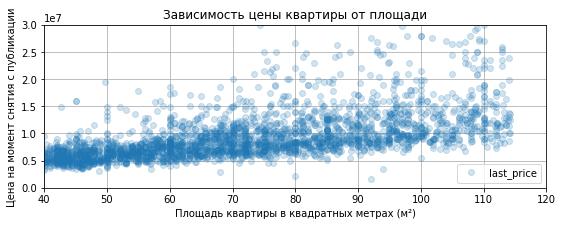

In [41]:
print('Корреляция между ценой и площадью: {:.2f}'.format(saintp_best['last_price'].corr(saintp_best['total_area'])))
display(saintp_best['total_area'].describe())
saintp_best.plot(y='last_price', x='total_area', style='o', alpha=0.2, figsize=(9, 3), grid=True, xlim=(40, 120), ylim=(0, 0.3e8))
plt.title('Зависимость цены квартиры от площади')
plt.xlabel('Площадь квартиры в квадратных метрах (м²)')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.6.2. Изучим цену

count    2.628000e+03
mean     9.642913e+06
std      5.384318e+06
min      1.600000e+06
25%      6.500000e+06
50%      8.300000e+06
75%      1.100000e+07
max      8.200000e+07
Name: last_price, dtype: float64

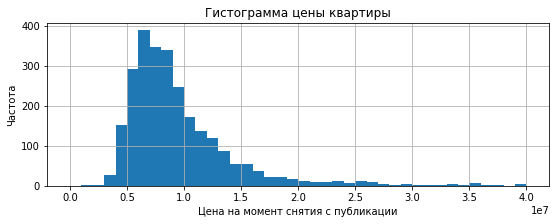

In [42]:
display(saintp_best['last_price'].describe())
saintp_best['last_price'].plot(kind='hist', figsize=(9, 3), grid=True, range=(0, 0.4e8), bins=40)
plt.title('Гистограмма цены квартиры')
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Частота')
plt.show()

#### 4.6.3. Изучим число комнат

Корреляция между ценой и числом комнат: 0.16


count    2628.000000
mean        2.482877
std         0.894561
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

,last_price
rooms,
1,7.741096e+06
2,9.102991e+06
3,1.070420e+07
4,1.020427e+07
5,1.029276e+07
more than 5,1.256871e+07


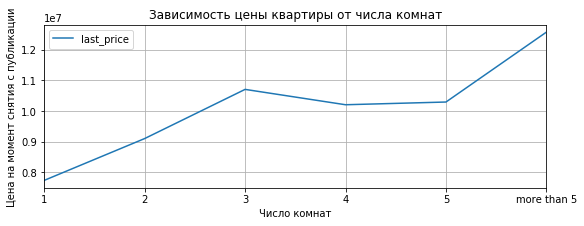

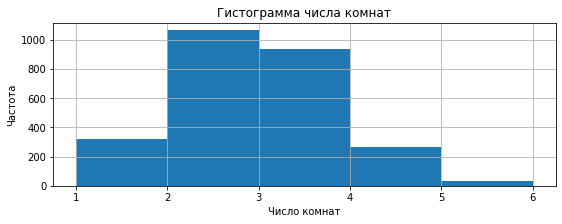

In [43]:
print('Корреляция между ценой и числом комнат: {:.2f}'.format(saintp_best['last_price'].corr(saintp_best['rooms'])))
display(saintp_best['rooms'].describe())
roomsp_data = saintp_best[['rooms', 'last_price']]
roomsp_data.loc[(saintp_best['rooms'] > 5), 'rooms'] = 'more than 5'
display(roomsp_data.pivot_table(index='rooms', values='last_price'))
display(roomsp_data.pivot_table(index='rooms', values='last_price').plot(figsize=(9, 3), grid=True))
plt.title('Зависимость цены квартиры от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
saintp_best['rooms'].plot(kind='hist', figsize=(9, 3), grid=True, range=(1, 6), bins=5)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.show()

#### 4.6.4. Изучим высоту потолков

Корреляция между ценой и высотой потолков: 0.05


count    1678.000000
mean        3.068266
std         0.977881
min         2.000000
25%         2.800000
50%         3.000000
75%         3.200000
max        32.000000
Name: ceiling_height, dtype: float64

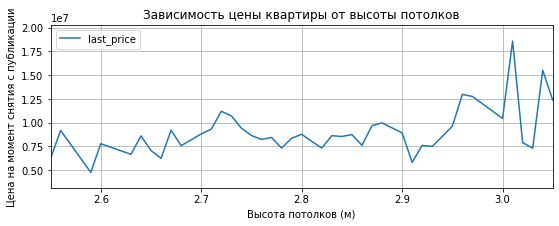

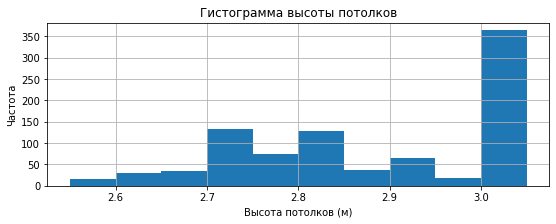

In [44]:
print('Корреляция между ценой и высотой потолков: {:.2f}'.format(saintp_best['last_price'].corr(saintp_best['ceiling_height'])))
display(saintp_best['ceiling_height'].describe())
saintp_best.pivot_table(index='ceiling_height', values='last_price').plot(figsize=(9, 3), grid=True, xlim=(2.55, 3.05))
plt.title('Зависимость цены квартиры от высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()
saintp_best['ceiling_height'].hist(figsize=(9, 3), grid=True, range=(2.55, 3.05), bins=10)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Частота')
plt.show()

#### 4.6.5. Изучим зависимость между ценой и этажом 

,last_price
floor_group,
первый,7.656082e+06
последний,9.094888e+06
другой,1.009202e+07


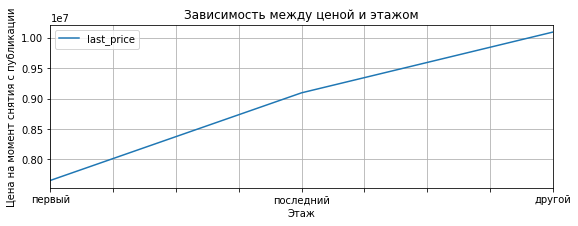

In [45]:
display(saintp_best.pivot_table(index='floor_group', values='last_price').sort_values('last_price'))
saintp_best.pivot_table(index='floor_group', values='last_price').sort_values('last_price').plot(figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и этажом')
plt.xlabel('Этаж')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.6.6. Изучим зависимость между ценой и удалённостью от центра

Корреляция между ценой и удалённостью от центра: -0.08


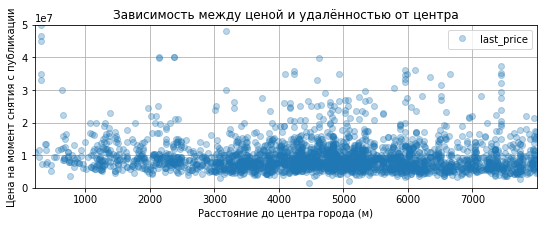

In [46]:
print('Корреляция между ценой и удалённостью от центра: {:.2f}'.format(saintp_best['last_price'].corr(saintp_best['cityCenters_nearest'])))
saintp_best.plot(y='last_price', x='cityCenters_nearest', style='o', alpha=0.3, ylim=(0, 0.5e8), figsize=(9, 3), grid=True)
plt.title('Зависимость между ценой и удалённостью от центра')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#### 4.6.7. Изучим дату размещения объявления

Корреляция между ценой и годом размещения: 0.02


,last_price
exposition_year,
2014,1.542513e+07
2015,9.612644e+06
2016,9.627835e+06
2017,9.274263e+06
2018,9.696964e+06
2019,1.053865e+07


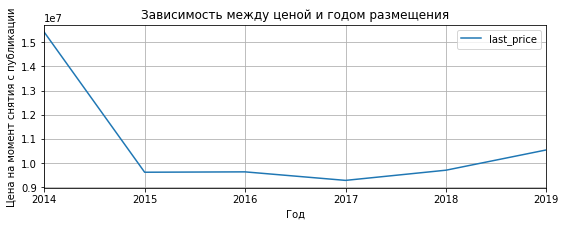

In [47]:
print('Корреляция между ценой и годом размещения: {:.2f}'.format(saintp_best['last_price'].corr(saintp_best['exposition_year'])))
display(saintp_best.pivot_table(index='exposition_year', values='last_price'))
display(saintp_best.pivot_table(index='exposition_year', values='last_price').plot(figsize=(9, 3), grid=True))
plt.title('Зависимость между ценой и годом размещения')
plt.xlabel('Год')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

### Вывод

Проанализировав цены в центре Санкт-Петербурга, пришли к следующим выводам: 

1) Подавляющее число объявлений имеет площадь квартиры от 40 до 100 м2, c ценой менее 15млн.руб. Медианная площадь - 74 м2.

2) Подавляющее число объявлений имеет цену не более 20 млн.руб. Q1=6,4 млн.руб., Q2=8,7 млн.руб., Q3=13 млн.руб. Самая дешевая квартира стоит 1,6 млн.руб., а самая дорогая 763 млн.руб., медианная цена - 8.7 млн.руб.

3) Подавляющее число объявлений имеет число комнат менее 5. Медианное число комнат - 3 комнаты.

4) Большинство объявлений имеет высоту потолка равную 3м. Медианная высота потолка - 2.8м.

5) Этаж сильно влияет на цену. Так между первым и последним этажом разница более, чем в 2 раза.

6) Внутри центрального кольца расстояние от центра не сильно влияет на стоимость, скорее наблюдается небольшая отрицательная корреляция.

7) Также как и в целом по Ленинградской области, существует заметная зависимость между ценой квартиры и годом размещения объявления. 

> **_<span style="color:green">По этому блоку у меня нет замечаний, все классно. Но нужно добавить подписи и названия для всех графиков в твоей работе.</span>_**
>



<div class="alert alert-info">

## Шаг 5. Общий вывод

В результате проведенного исследования объявлений о продаже квартир выявили основные параметры, которые влияют на стоимость квартиры:
- количество квадратных метров,
- количество комнат,
- этаж (чем выше, тем дороже).

С 2014 года наблюдалось падение стоимости квартир, которое сменилось ростом в 2018 году. Но, вероятно, "коронокризис" опять развернет этот тренд вниз.

>**Спасибо тебе за сдачу твоего проекта. Работа получилась просто замечательная и хорошо структурированная. Видно, что ты отлично справился с материалами спринта и уверенно применяешь полученные навыки на практике. Но для зачёта проекта тебе нужно еще чуть-чуть поработать и исправить ряд некритичных недочётов.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта, твой чистый код и развернутые выводы и комментарии. Продолжай и дальше совершенствоваться в этих аспектах в своих последующих проектах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
>
>**Update: Привет! Спасибо тебе за оперативную работу над недочётами. Теперь всё отлично, и твой проект будет зачтен, поздравляю! :)**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод